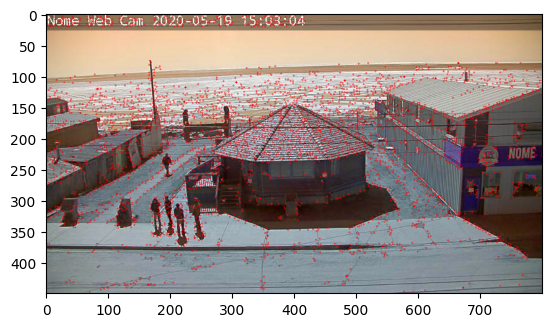

True

In [4]:
#Worked with Kyung Min Ko, Kanav Arte, and Yash Ashtekar on this algorithm
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
import pdb

def sobel_edge_detection(image):
  horizontal = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], np.float32) #y-direction kernel for Sobel
  vertical = np.array([[1,2,1], [0,0,0], [-1,-2,-1]], np.float32) #x-direction kernel

  [rows,columns] = np.shape(image) #the shape of the grayscaled image

  #initialize array of zeros of the image shape for the x and y direction gradient approximation.
  gx = np.zeros((rows, columns), dtype=np.float32)
  gy = np.zeros((rows, columns), dtype=np.float32)

  #for loops to calculate the gradients in the x and y directions.
  for i in range(rows - 2):
    for j in range(columns - 2):
      gx[i+1,j+1] = np.sum(np.multiply(horizontal, image[i:i + 3, j:j + 3])) #x-direction gradient approximation image, we just take the sum of
      gy[i+1,j+1] = np.sum(np.multiply(vertical, image[i:i + 3, j:j + 3]))#y-direction gradient approximation image,


  #normalize gradients
  gx = np.uint8((gx*255.0)/gx.max())
  gy = np.uint8((gy*255.0)/gy.max())

  #Calculate corresponding elements in Harris Matrix
  ix_2 = np.square(gx)
  iy_2 = np.square(gy)
  ix_iy = np.multiply(gx,gy)
  iy_ix = np.multiply(gy,gx)

  #initialize Harris Response matrix
  R = np.zeros((rows, columns), np.float32)
  k = 0.06

  for i in range(rows):
    for j in range(columns):
      M = np.array([[ix_2[i][j],ix_iy[i][j]],[iy_ix[i][j], iy_2[i][j]]])
      determinant = np.linalg.det(M)
      trace = np.trace(M)
      R_val = determinant - k * np.square(trace)
      R[i][j] = R_val

  #Return Harris Response
  return R


def corner_detection(R, img_arr):
  #Dimensions of R matrix
  [width, height] = R.shape

  #Set threshold value for Harris Response
  #We can change this value to manipulate the results
  thresh = 10000

  #set paraments for drawing corner
  radius = 1
  color = (255, 0, 0)
  thickness = 1

  #Iterate through elements in Response matrix to apply threshold and non-maxima suppression
  for row in range(width):
    for column in range(height):
      #If R value is higher than threshold
      if R[row][column] > thresh:
        max_val = R[row][column]

        #Apply non-maxima suppression
        local_max = True
        for n in range(5):
          for m in range(5):
            #Check if index in matrix exist
            if (row + n - 2 < width) and (column + m - 2 < height):
              #check if there is another local max value
              if (R[row + n - 2][column + m - 2] > max_val):
                #if R value is a local maximum value other than original, set local_max to False
                local_max = False
                break

        if local_max:
          cv2.circle(img_arr, (column, row), radius, color, thickness)

  return img_arr


#read image
image = cv2.imread('Intersec.jpg')

#convert to array
img_arr = np.array(image)

#convert to grayscale
gray_img = 0.2126 * img_arr[:,:,2] + 0.7152 * img_arr[:,:,1] + 0.0722 * img_arr[:,:,0]

#convert to uint8 for compatibility and ease of calculations
gray_img = gray_img.astype(np.uint8)

#Apply gaussian blurring
blur_img = cv2.GaussianBlur(gray_img, (5,5), 5)

#apply sobel detection
R = sobel_edge_detection(blur_img)

#apply corner detection
corner_img = corner_detection(R, img_arr)

#Display and save results
plt.imshow(corner_img, cmap = plt.get_cmap('gray'), vmin=0, vmax=255)
plt.show()

cv2.imwrite('Corner Detected Image.png', corner_img.astype(np.uint8))
